In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [2]:
#Read the CSV file
Dataset = pd.read_csv('C:\\Users\\atang\\OneDrive\\Documents\\Data Science MSc\\Machine Learning\\COMP 1886 - Coursework\\COMP 1886 - Coursework datasetcsv.csv')
Dataset.head()

,Date,80% of the expenses were made by,80% of the expenses were made by .1,80% of the expenses were made in the following regions,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,1 Jan 2020,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09
1,2 Jan 2020,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97
2,3 Jan 2020,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00
3,4 Jan 2020,Private sector,Female,E12000004,116.27,135.19,108.49,107.90,119.54
4,5 Jan 2020,Private sector,Female,E12000003,113.75,135.02,99.38,107.01,113.30


In [3]:
#Recognise how large the dataset is by identifying the shape of the dataset
Dataset.shape
#Results
#From results, we can identify that the Dataset has 1447 rows and 9 columns

(1447, 9)

In [4]:
#Check for patterns in data
#Use msno.matrix nullity matrix to quickly visually pick out patterns in data completion. This will allow one to see at a glance attributes containing rows of missing data. identifying rows/columns with missing data will enable better data cleaning procedures to be carried out such as filling in missing values.
#The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

#Results below
#We can therefore notice from the summary of the dataset that the columns titled 80% of the expenses were made by, 80% of the expenses were made by .1, Miscellaneous (£) and Entertainment (£).

<Axes: >

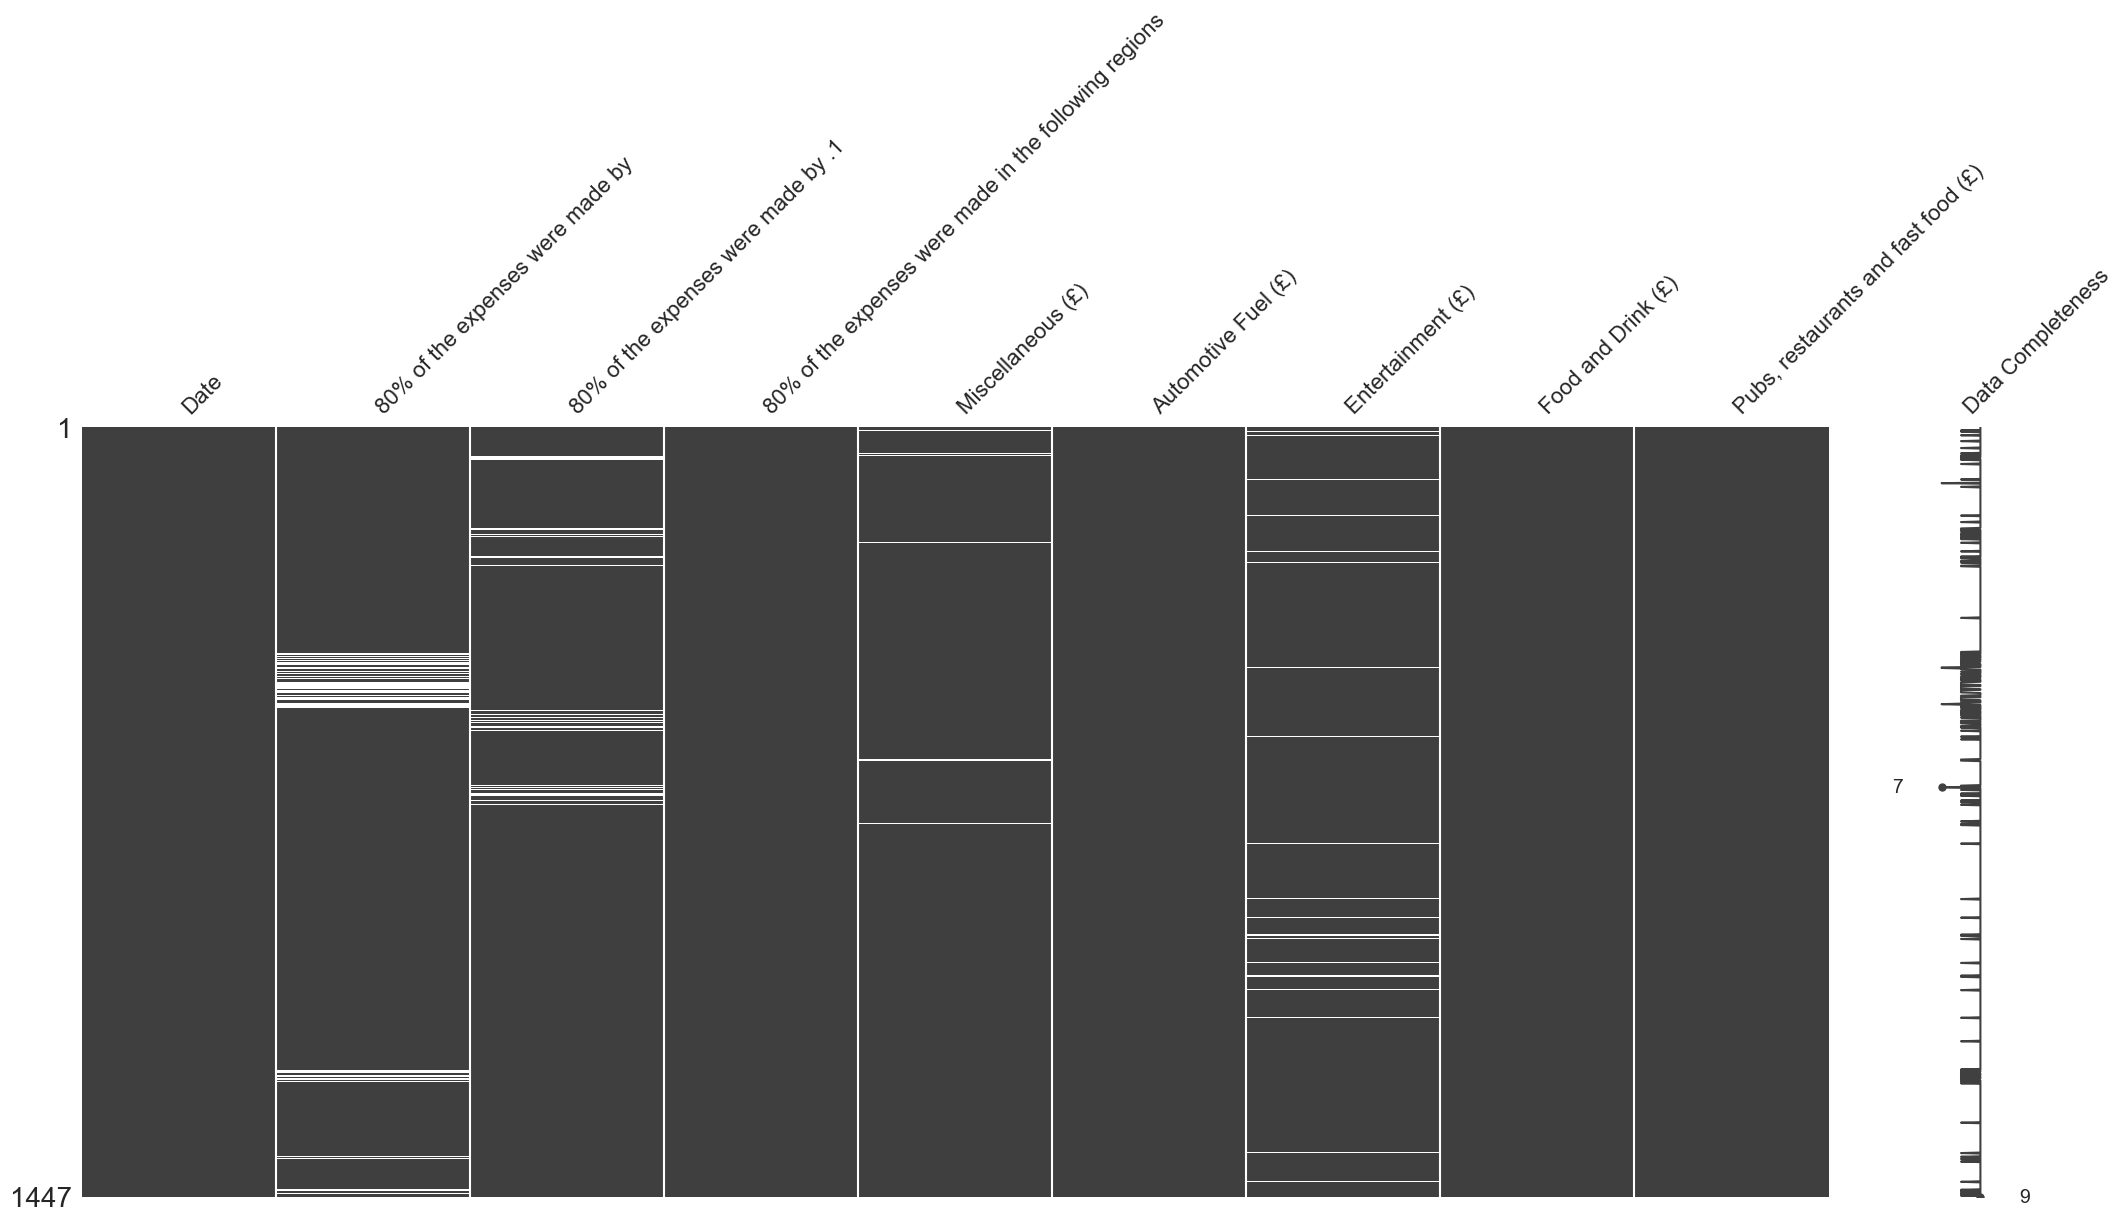

In [5]:
msno.matrix(Dataset,labels=True)

In [6]:
3# Statistical data like percentile (lower quartile, median and upper quartile), mean and std of the numerical or object type columns of the DataFrame is calculated. This allows the user to identify patterns within the data or use the percentiles (lower and upper quartile) to identify the outliers within the DataFrame that may be included or excluded when performing data cleaning procedures.
Dataset.describe()

,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
count,1432.000000,1447.000000,1417.000000,1447.000000,1447.000000
mean,109.824930,130.305639,63.141849,121.937222,82.435708
std,31.123886,39.759992,31.361024,20.224708,33.906750
min,36.920000,40.160000,5.950000,86.360000,7.900000
25%,84.057500,97.455000,31.480000,105.685000,60.530000
50%,114.040000,135.750000,71.840000,114.520000,91.320000
75%,136.452500,156.865000,87.750000,140.350000,106.400000
max,166.850000,500.000000,127.960000,188.250000,139.460000


In [7]:
#Identify the data types for columns within the Dataset enabling recognition of categorical and numeric columns
#It is important to know their data types as this allows easy conversion of non-numeric columns (with figures) to numeric columns.
#Converting to numeric values results in missing values to be converted to NaN
#From here, it will be easier to fill in missing values (NaN) using .fillna when carrying out data pre-processing/cleaning procedures.

#create a function to identify the data types of each column  in the dataset
for column in Dataset.columns:
    print('The data type of', column, 'is', Dataset[column].dtype)

The data type of Date is object
The data type of 80% of the expenses were made by  is object
The data type of 80% of the expenses were made by .1 is object
The data type of 80% of the expenses were made in the following regions is object
The data type of Miscellaneous (£) is float64
The data type of Automotive Fuel (£) is float64
The data type of Entertainment (£) is float64
The data type of Food and Drink (£) is float64
The data type of Pubs, restaurants and fast food (£) is float64


In [8]:
#The head of the Dataset is generated again to remind the user of which columns within the dataset contain figures. form here it ca be determined which non-numeric columns wil be converted to numeric columns when cleaning the dataset.
Dataset.head()

#Result: We can notice that the data type for columns Miscellaneous (£), Automotive Fuel (£), of Entertainment (£), Food and Drink (£) and Pubs, restaurants and fast food is a float and as such, will be converted to numeric data types (integer).

,Date,80% of the expenses were made by,80% of the expenses were made by .1,80% of the expenses were made in the following regions,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,1 Jan 2020,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09
1,2 Jan 2020,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97
2,3 Jan 2020,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00
3,4 Jan 2020,Private sector,Female,E12000004,116.27,135.19,108.49,107.90,119.54
4,5 Jan 2020,Private sector,Female,E12000003,113.75,135.02,99.38,107.01,113.30


In [9]:
#Skewness and Kurtosis
#Skewness and Kurtosis: Link1 and Link2 Rule of thumb : If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

# The expected value of kurtosis is 3. This is observed in a symmetric distribution. A kurtosis greater than three will indicate Positive Kurtosis. In this case, the value of kurtosis will range from 1 to infinity. Further, a kurtosis less than three will mean a negative kurtosis. The range of values for a negative kurtosis is from -2 to infinity. The greater the value of kurtosis, the higher the peak.

#Create a function to calculate the skewness of only columns with numerical data. 
#we know that all columns with numerical data have the same data type, we can use this to write the function.
for column in Dataset.columns:
    if Dataset[column].dtype == 'float64':
       print(column, '=', Dataset[column].skew(axis = 0, skipna = True))
        

#Results: 


Miscellaneous (£) = -0.37521523713440647
Automotive Fuel (£) = 0.43533679847614254
Entertainment (£) = -0.3150848315933804
Food and Drink (£) = 0.623862806910115
Pubs, restaurants and fast food (£) = -0.5940964898363515


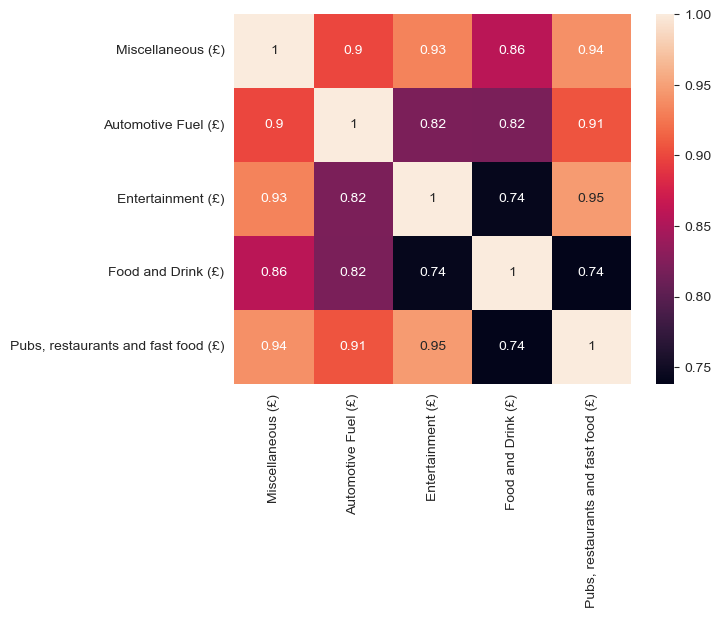

In [10]:
#Correlation
#create a function to calculate  and display a heatmap showing the correlation between columns
numeric_columns = Dataset.select_dtypes(include = ['float64'])
correlation = numeric_columns.corr()
sns.heatmap(correlation, annot = True)
plt.show()

<Axes: xlabel='Miscellaneous (£)', ylabel='Pubs, restaurants and fast food (£)'>

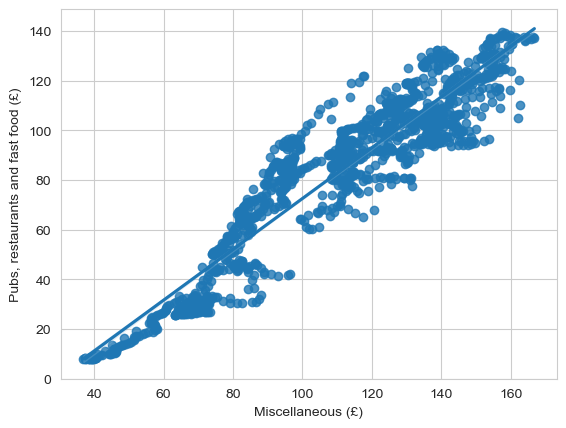

In [11]:
#Regression line
sns.regplot(data = Dataset, x = 'Miscellaneous (£)', y = 'Pubs, restaurants and fast food (£)', fit_reg = True)

C:\Users\atang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Miscellaneous (£)', ylabel='Count'>

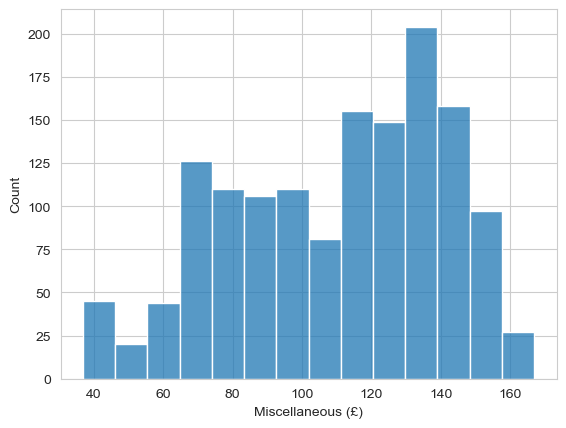

In [12]:
#Histogram
Histogram1 = Dataset['Miscellaneous (£)']
sns.histplot(Histogram1)

C:\Users\atang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pubs, restaurants and fast food (£)', ylabel='Count'>

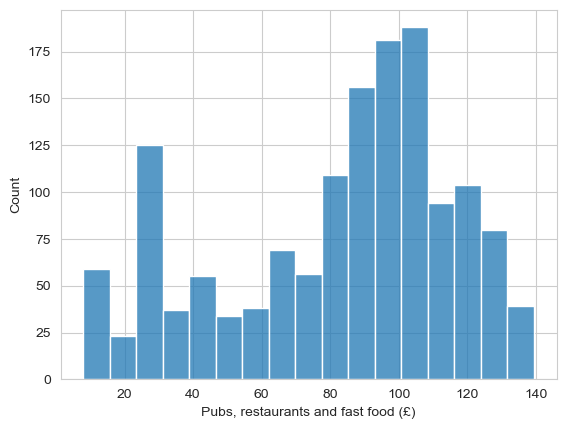

In [13]:
Histogram2 = Dataset['Pubs, restaurants and fast food (£)']
sns.histplot(Histogram2)